In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

tweets = pd.read_excel('tweets-stemmed.xlsx', usecols=['label','tweet_token_stemmed'])
tweets.columns = ['label','tweet']

tweets.head()

,label,tweet
0,0,"['awal', 'scene', 'bawang', 'nang', 'keinget',..."
1,1,"['gila', 'drama', 'cakep', 'cinematography', '..."
2,0,['jahat']
3,0,"['males', 'nonton', 'drakor', 'stalk', 'gtgt',..."
4,0,"['nam', 'do', 'san', 'emang', 'kasih', 'previe..."


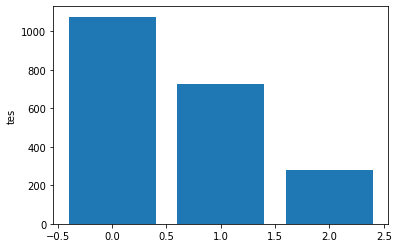

In [194]:
temp = tweets['label'].value_counts()
plt.bar([0,1,2], height=temp)
plt.ylabel('tes')
plt.show()

In [195]:
#parse string list to string
import ast

#join list
def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
tweets["tweet_join"] = tweets["tweet"].apply(join_text_list)
tweets["tweet_join"].head()

0    awal scene bawang nang keinget karakter romant...
1    gila drama cakep cinematography kece cerita ba...
2                                                jahat
3                 males nonton drakor stalk gtgt wkwkw
4    nam do san emang kasih preview dikit opening d...
Name: tweet_join, dtype: object

In [196]:
#define predictor and target for classification

target = 'label'
predictor = ['tweet_join']
y = tweets[target]
X = tweets[predictor]

print(X.head())
print(y.head())

                                          tweet_join
0  awal scene bawang nang keinget karakter romant...
1  gila drama cakep cinematography kece cerita ba...
2                                              jahat
3               males nonton drakor stalk gtgt wkwkw
4  nam do san emang kasih preview dikit opening d...
0    0
1    1
2    0
3    0
4    0
Name: label, dtype: int64


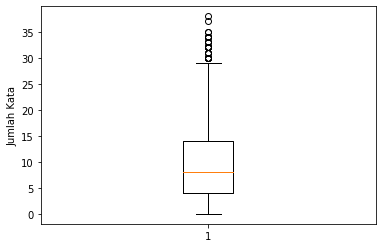

In [197]:
def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return len(texts)

tweets["tweet_list"] = tweets["tweet"].apply(convert_text_list)

plt.boxplot(tweets["tweet_list"])
plt.ylabel('Jumlah Kata')
plt.show()

In [198]:
#testing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer

max_features = 38

tf_idf = TfidfVectorizer()
X_tfidf = tf_idf.fit_transform(X['tweet_join']).toarray()
print(type(X_tfidf), X_tfidf.shape)

cv = CountVectorizer()
X_cv = cv.fit_transform(X['tweet_join']).toarray()
print(type(X_cv), X_cv.shape)

hv = HashingVectorizer()
X_hv = hv.fit_transform(X['tweet_join'])
print(type(X_hv), X_hv.shape)

<class 'numpy.ndarray'> (2085, 4724)
<class 'numpy.ndarray'> (2085, 4724)
<class 'scipy.sparse.csr.csr_matrix'> (2085, 1048576)


In [199]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.36, random_state=200)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(y_train.value_counts())
print(y_test.value_counts())

(1334, 4724)
(1334,)
(751, 4724)
(751,)
0    706
1    450
2    178
Name: label, dtype: int64
0    370
1    277
2    104
Name: label, dtype: int64


In [200]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

print(type(y_train_categorical),y_train_categorical.shape)
print(type(y_test_categorical),y_test_categorical.shape)

<class 'numpy.ndarray'> (1334, 3)
<class 'numpy.ndarray'> (751, 3)


In [201]:
#creating model sequential
model = Sequential()
model.add(Dense(64, input_dim=4724, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

#compile kelas model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X_train, y_train_categorical, epochs=20)

Epoch 1/20
1334/1334 [==============================] - 0s 280us/step - loss: 1.0437 - accuracy: 0.5255
Epoch 2/20
1334/1334 [==============================] - 0s 234us/step - loss: 0.9380 - accuracy: 0.5292
Epoch 3/20
1334/1334 [==============================] - 0s 220us/step - loss: 0.8361 - accuracy: 0.5292
Epoch 4/20
1334/1334 [==============================] - 0s 208us/step - loss: 0.6691 - accuracy: 0.6192
Epoch 5/20
1334/1334 [==============================] - 0s 212us/step - loss: 0.4404 - accuracy: 0.9025
Epoch 6/20
1334/1334 [==============================] - 0s 233us/step - loss: 0.2254 - accuracy: 0.9655
Epoch 7/20
1334/1334 [==============================] - 0s 201us/step - loss: 0.1152 - accuracy: 0.9768
Epoch 8/20
1334/1334 [==============================] - 0s 200us/step - loss: 0.0699 - accuracy: 0.9835
Epoch 9/20
1334/1334 [==============================] - 0s 205us/step - loss: 0.0534 - accuracy: 0.9873
Epoch 10/20
1334/1334 [==============================] - 0s 265u

In [202]:
#evaluate train data

scores = model.evaluate(X_train, y_train_categorical)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   

1334/1334 [==============================] - 0s 82us/step
Accuracy on training data: 0.9925037622451782% 
 Error on training data: 0.007496237754821777


In [188]:
dataTesting = X_test
predictions = model.predict_classes(dataTesting)
predictions

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,

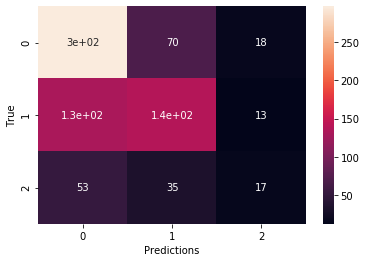

In [189]:
#evaluation confussion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

matrix = confusion_matrix(y_test, predictions)
sn.heatmap(matrix, annot=True)
plt.xlabel("Predictions")
plt.ylabel("True") 
plt.show()

In [190]:
#check accuration score from confussion matrix using library

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Error Rate: {:.2f}'.format(1 - accuracy_score(y_test, predictions)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, predictions, average='macro')))
print('Precision Score: {:.2f}'.format(precision_score(y_test, predictions, average='macro')))
print('Recall Score: {:.2f}'.format(recall_score(y_test, predictions, average='macro')))

Accuracy: 0.58
Error Rate: 0.42
F1 Score: 0.48
Precision Score: 0.51
Recall Score: 0.47


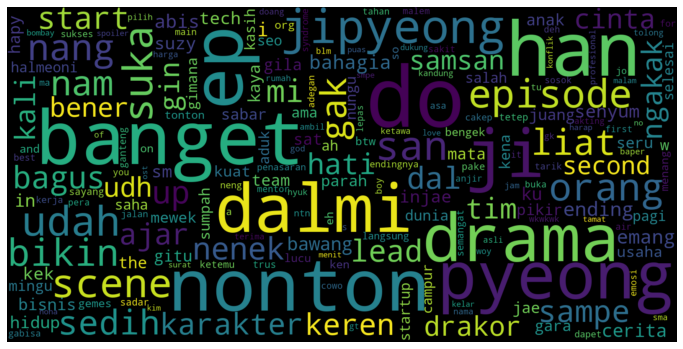

In [191]:
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(['huhuhu', 'dg', 'rt', 'dgn', 'ny', 'lu', 'klo', 'ini', 'aku', 'ada',
                       'kalo', 'amp', 'biar', 'bilang', 'gue', 'gw', 'di', 'gua', 'spt',
                        'krn', 'krna', 'nya', 'nih', 'sih', 'untk', 'sbg', 'utk', 'karna',
                       'si', 'tau', 'tdk', 'tuh','ya', 'yang', 'itu', 'seh', 'dr', 'ga', 
                       'jd', 'jgn', 'sdh', 'aja', 'sdh', 'dah', 'knp', 'bkn', 'ke', 'dari',
                       'rek', 'nyong', 'wkwk', 'trs', 'ttg', 'seperti', 'km','ni', 'oh', 'smpe'
                       'sudah', 'emg', 'iya', 'pas', 'kayak', 'woooo', 'elu', 'sm'
                       'nyg', 'hehe', 'pen', 'nder', 'nan', 'loh', 'rt', 'dan', 'di', 'jdi', 
                       'dlu', 'guys', 'rek', 'lur', 'lg', 'pdhl', 'jg', 'yipey', 'bgt', 'mah', 'lgi'
                       'knapa', 'yah', 'ngmg', 'njing', 'ngmgi', 'yg', 'tpi', 'tp', 'karena', 'ih', 'oey'])


list_stopwords = set(list_stopwords)

temp = tweets

neg_tweets = temp.loc[temp['label'] == 1].tweet_join
neg_string = []
for t in neg_tweets:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

from wordcloud import WordCloud

wordcloud = WordCloud(
    width=1600, 
    height=800,
    max_font_size=200, 
    collocations=False,
    stopwords=list_stopwords).generate(neg_string)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

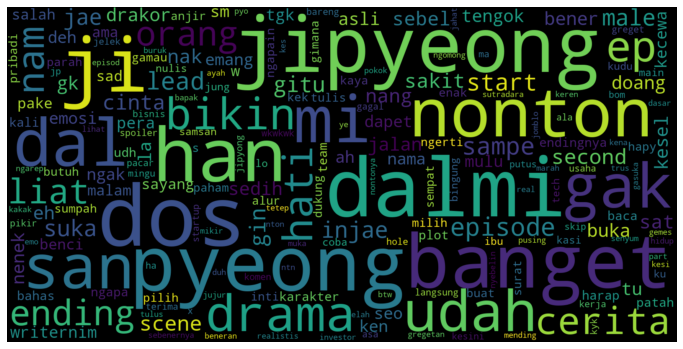

In [192]:
neg_tweets = temp.loc[temp['label'] == 2].tweet_join
neg_string = []
for t in neg_tweets:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(
    width=1600, 
    height=800,
    max_font_size=200, 
    collocations=False).generate(neg_string)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()